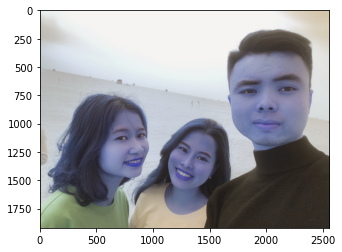

In [1]:
import time
import dlib
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
image = cv2.imread('img1.jpg')
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# Khai báo việc sử dụng các hàm của dlib
hog_face_detector = dlib.get_frontal_face_detector()
cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

In [5]:

# Thực hiện xác định bằng HOG và SVM
start = time.time()
faces_hog = hog_face_detector(image, 1)
end = time.time()
print("Hog + SVM Execution time: " + str(end-start))

Hog + SVM Execution time: 2.4310977458953857


In [6]:
# Vẽ một đường bao màu xanh lá xung quanh các khuôn mặt được xác định ra bởi HOG + SVM
for face in faces_hog:
  x = face.left()
  y = face.top()
  w = face.right() - x
  h = face.bottom() - y

  cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

In [7]:
# Thực hiện xác định bằng CNN
start = time.time()
faces_cnn = cnn_face_detector(image, 1)
end = time.time()
print("CNN Execution time: " + str(end-start))

CNN Execution time: 389.736722946167


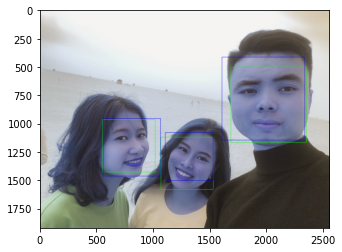

In [8]:

# Vẽ một đường bao đỏ xung quanh các khuôn mặt được xác định bởi CNN
for face in faces_cnn:
  x = face.rect.left()
  y = face.rect.top()
  w = face.rect.right() - x
  h = face.rect.bottom() - y

  cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

plt.imshow(image, cmap='gray')
plt.show()